## Imports

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
DATA_AUDIO_PATH = 'Data/genres_original/'
DATA_VIDEO_PATH = 'Data/images_original/'

## Loading csv data

In [4]:
df= pd.read_csv('Data\\features_30_sec.csv')

In [5]:
df.shape

(1000, 60)

In [6]:
df.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,1.297741e+05,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,3.758501e+05,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,1.564676e+05,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,1.843559e+05,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,3.433999e+05,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
5,blues.00005.wav,661794,0.302456,0.087532,0.103494,0.003981,1831.993940,1.030482e+06,1729.653287,201910.508633,...,72.549225,-1.838263,68.702026,-2.783800,42.447453,-3.047909,39.808784,-8.109991,46.311005,blues
6,blues.00006.wav,661794,0.291328,0.093981,0.141874,0.008803,1459.366472,4.378594e+05,1389.009131,185023.239545,...,83.248245,-10.913176,56.902153,-6.971336,38.231800,-3.436505,48.235741,-6.483466,70.170364,blues
7,blues.00007.wav,661794,0.307955,0.092903,0.131822,0.005531,1451.667066,4.495682e+05,1577.270941,168211.938804,...,70.438438,-10.568935,52.090893,-10.784515,60.461330,-4.690678,65.547516,-8.630722,56.401436,blues
8,blues.00008.wav,661794,0.408879,0.086512,0.142416,0.001507,1719.368948,1.632828e+05,2031.740381,105542.718193,...,50.563751,-7.041824,28.894934,2.695248,36.889568,3.412305,33.698597,-2.715692,36.418430,blues
9,blues.00009.wav,661794,0.273950,0.092316,0.081314,0.004347,1817.150863,2.982361e+05,1973.773306,114070.112591,...,59.314602,-1.916804,58.418438,-2.292661,83.205231,2.881967,77.082222,-4.235203,91.468811,blues


## EDA and Data Pre-processing

In [7]:
df['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [8]:
df['label']=df['label'].astype('category')
df['class_label']=df['label'].cat.codes

In [9]:
pd.unique(df.loc[:,'label':'class_label'].values.ravel())


array(['blues', 0, 'classical', 1, 'country', 2, 'disco', 3, 'hiphop', 4,
       'jazz', 5, 'metal', 6, 'pop', 7, 'reggae', 8, 'rock', 9],
      dtype=object)

In [10]:
hash_genre_name = dict(zip(df.class_label.unique(),df.label.unique()))
hash_genre_name

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [11]:
df.iloc[:,1:59] # Features that are required for training
# the audio file name is not a feature for training process 

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,4253.557033,...,1.789867,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665
996,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,...,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624
997,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,...,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515
998,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,3015.631004,...,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088


In [12]:
# find all columns with any NA values
print("Columns with NA values are",list(df.columns[df.isnull().any()]))

Columns with NA values are []


No null values in the dataset

There are no categorical variable as such. Hence, Dummy variable creation is not needed

## Spilt the dataset into Training and Testing

In [115]:
X=df.iloc[:,2:59]
y=df['class_label']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=5)

In [116]:
X.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160


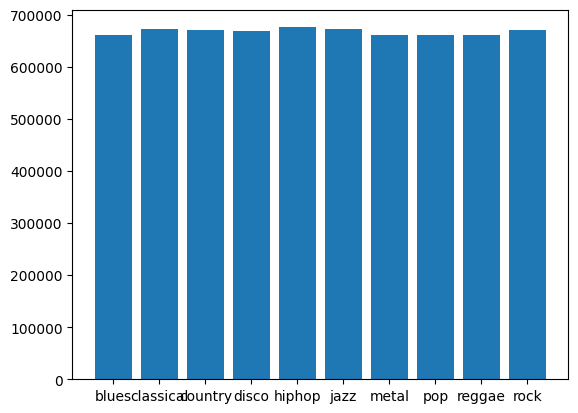

In [35]:
import matplotlib.pyplot as plt
plt.bar(df['label'],df['length'].astype('int32'))
plt.show()

## Min-Max normalization

In [117]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors

In [155]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)
print('KNN test score:')
knn.score(X_test_scaled,y_test)

KNN test score:


0.715

## K-fold cross Validation

In [145]:
from sklearn.model_selection import cross_validate
results = cross_validate(estimator= knn, X=X_train_scaled, y= y_train,cv=5, 
                            scoring = 'accuracy',return_train_score=True)

In [146]:
results

{'fit_time': array([0.00259542, 0.        , 0.0010469 , 0.00130153, 0.        ]),
 'score_time': array([0.02017093, 0.02506876, 0.01353526, 0.01191401, 0.0169301 ]),
 'test_score': array([0.69375, 0.59375, 0.65625, 0.6875 , 0.6125 ]),
 'train_score': array([0.8109375, 0.8171875, 0.815625 , 0.828125 , 0.815625 ])}

In [154]:
print("Avg train score:", round(results['train_score'].mean()*100,3),'%')
print("Avg test score:", round(results['test_score'].mean()*100,3),'%')

Avg train score: 81.75 %
Avg test score: 64.875 %


## Predict using KNN

In [156]:
df_test = pd.read_csv('Data\\features_30_sec.csv').sample(n= 6)
actual_class_test_data = df_test['label']
actual_class_test_data

345    disco
696    metal
70     blues
646    metal
720      pop
322    disco
Name: label, dtype: object

In [157]:
df_test = df_test.iloc[:,2:59]
df_test_transformed = scaler.transform(df_test)

df_test

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
345,0.407335,0.082570,0.135482,0.002826,2248.003751,840206.125964,2368.669507,326708.179645,4609.537685,3.736112e+06,...,-1.045643,30.940132,-3.284158,30.866360,-1.869772,37.330929,-0.713399,50.328873,-0.551771,42.523273
696,0.518382,0.075576,0.188244,0.003147,2493.501781,441493.814386,2286.511921,111184.980257,5104.892952,1.247862e+06,...,8.217520,33.007252,-6.182576,25.424282,3.795821,28.823950,-1.914849,35.920837,0.896141,22.341583
70,0.322809,0.091978,0.106137,0.001106,2159.392000,328873.563355,2130.224381,68626.583220,4684.529188,1.074291e+06,...,1.961996,70.742172,-12.309114,93.009857,3.256355,64.567757,-8.804638,64.459396,-3.371866,71.511757
646,0.482436,0.075207,0.212496,0.000567,2795.223327,95665.324281,2321.669987,28374.880591,5455.028164,2.989272e+05,...,7.668679,32.542507,-8.689568,25.735662,3.171215,25.679869,-6.837353,26.338881,3.886339,25.471832
720,0.412466,0.081620,0.248107,0.007425,3486.337771,668860.182532,3132.002142,82498.874199,7442.344634,1.701945e+06,...,-0.168655,43.794792,-0.616424,45.557865,0.754788,49.431267,0.734119,62.425705,2.008201,66.815796
322,0.436546,0.089609,0.136890,0.004296,3708.046288,801585.956332,3249.645635,111956.939919,7808.592277,1.698693e+06,...,-2.920286,37.727352,-2.889933,62.781891,-1.791919,46.068542,-0.714492,59.320713,-0.985792,55.345570


In [158]:
genre_predictions = knn.predict(df_test_transformed)

In [159]:
print('*****************')
print('Actual class:')
print('*****************')
for actual_class in actual_class_test_data.values:
    print(actual_class)

print('\n*****************')
print('predicted class:')
print('*****************')
for predicted_class in genre_predictions:
    print(hash_genre_name[predicted_class])

*****************
Actual class:
*****************
disco
metal
blues
metal
pop
disco

*****************
predicted class:
*****************
disco
metal
blues
metal
pop
disco


# Save the Model

In [165]:
pick1 = {
    'normal' : scaler,
    'knn': knn,
    'hgn': hash_genre_name,
}
pickle.dump(pick1, open('model/models'+ '.p','wb'))